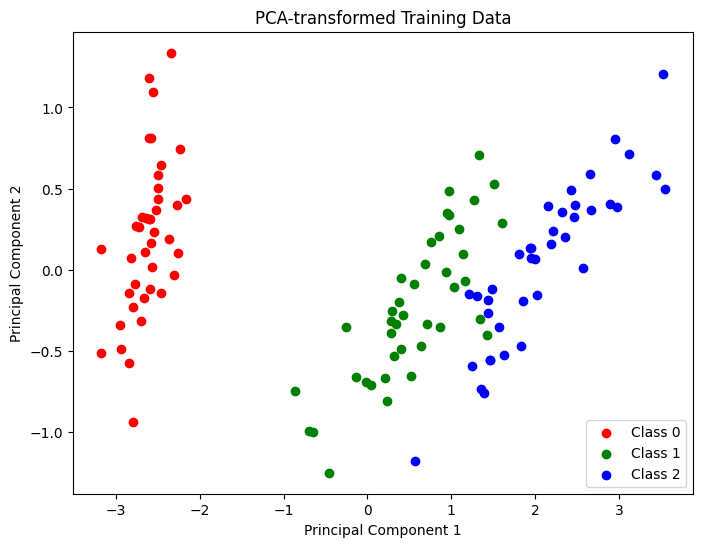

Accuracy on the test set: 1.00


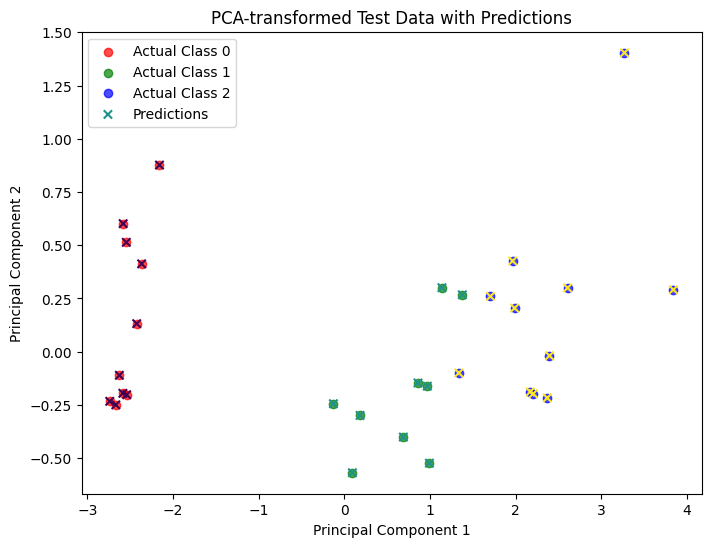

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the PCA-transformed training data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=f'Class {i}', color=colors[i])

plt.title('PCA-transformed Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Train a classifier on the PCA-transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred = knn_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Plot the PCA-transformed test data with predictions
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=f'Actual Class {i}', color=colors[i], alpha=0.7)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, marker='x', cmap='viridis', label='Predictions')
plt.title('PCA-transformed Test Data with Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
